NB02# **Aprendizaje supervisado**
# NB02. Introducción a las técnicas de Aprendizaje Supervisado

## <font color='blue'>**Conceptos básicos de aprendizaje supervisado**</font>

**Ejemplo 1**: Una banco recibe nuevos pedidos para acceder a una tarjeta de crédito. Cada pedido tiene información acerca del solicitante:
* Liquidación de sueldo
* Edad
* Estado Civil
* DICOM
* Situación crediticia
* Otras variables

*Problema*: Determinar si aceptar o rechazar la solicitud de tarjeta de crédito.

**Ejemplo 2**: El servicio de correo de la empresa recibe cientos de mails por día.

*Problema*: Clasificar cada mail como correo basura (spam) o correo deseado, para filtrar y aligerar el servicio.



En las **técnicas de aprendizaje supervisado** se dispone de un conjunto de registros (o ejemplos, o instancias) descritos por $n$ atributos: $A_{1}, A_{2}, ... , A_{n}$ y cada instancia está anotada con una etiqueta, pudiendo ser una clase (Spam / No Spam), o un valor numérico (score crediticio).

**El objetivo** es aprender un modelo (o función) a partir de los datos, buscando predecir sus etiquetas a partir de los atributos. Este modelo puede ser utilizado para predecir las etiquetas de nuevos registros sin anotar.

### Problemas de regresión

Dados $(x_{1}, y_{1}), (x_{2}, y_{2}), …, (x_{n}, y_{n})$

Aprender una $f(x)$ que permita predecir $y$ a partir de $x$

Si $y$ ϵ $ℝ^{n}$: **Es un problema de regresión**.

![Link](https://i.ibb.co/RYcdQqJ/regresion.png)



### Problemas de clasificación

Dados $(x_{1}, y_{1}), (x_{2}, y_{2}), …, (x_{n}, y_{n})$

Aprender una $f(x)$ que permita predecir $y$ a partir de $x$

Si $y$ es categórica: **Es un problema de clasificación**.

![Link](https://i.ibb.co/P4hLkGt/clasificaci-n.png)

La variable $x$ puede ser multidimensional.

Cada dimensión corresponde a un atributo:
* Edad del paciente
* Tamaño del tumor
* Uniformidad en la forma de la célula
* Etcétera

**La regresión busca “acercar” los datos a una función (lineal, polinomial, etc.)**.

**La clasificación busca separar los datos mediante ciertos “bordes”**.

### Elección de hiperparámetros

Dividir el conjunto total de ejemplos en tres subconjuntos:

* **Entrenamiento**: aprendizaje de variables del modelo.
* **Validación**: ajuste/elección de hiperparámetros.
* **Prueba**: estimación final del desempeño del modelo entrenado (y con hiperparámetros elegidos adecuadamente).
![Link](https://i.ibb.co/mXY2Kfc/sets.png)

## <font color='blue'>**Modelos de Regresión Lineal y Polinomial**</font>

### Regresión Lineal

Busca ajustar los datos de entrenamiento mediante una **función que sea un hiperplano**.

$$y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{d}x_{d}=
\sum_{j=0}^{d}\theta_{j}x_{j}$$

Los valores 𝜃 son los pesos de los atributos (o features en inglés). Se entrena minimizando la suma del error cuadrático.

### Regresión Polinomial

Busca ajustar los datos de entrenamiento mediante una **función polinomial**.

$$y(x,w) = w_{0}+w_{1}x+w_{2}x^{2}+...+w_{M}x^{M}=
\sum_{j=0}^{M}w_{j}x^{j}$$

Mientras **más alto el grado del polinomio**, más se ajusta a los datos, pero se vuelve más complejo y **tiende a sobreajustar**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import sklearn
sklearn.show_versions()


System:
    python: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.7.2
        numpy: 1.25.2
        scipy: 1.11.4
       Cython: 3.0.10
       pandas: 2.0.3
   matplotlib: 3.7.1
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 2
         prefix: libgomp
       filepath: /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 2
 

### Aplicación de Regresión Lineal


Ejemplo en este [link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

En el siguiente ejemplo utilizaremos la primera característica del conjunto de datos de diabetes, de manera de implementar un modelo de regresión lineal.

![Link](https://i.ibb.co/rGRWYzm/regresion1.png)

In [ ]:
# Cargar el dataset de diabetes
diabetes = datasets.load_diabetes()

In [ ]:
datos=pd.DataFrame(diabetes.data)
datos.shape

(442, 10)

In [ ]:
datos

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
# Utilizar una característica
diabetes_X = diabetes.data[:, np.newaxis, 9]

In [ ]:
diabetes_X

array([[-0.01764613],
       [-0.09220405],
       [-0.02593034],
       [-0.00936191],
       [-0.04664087],
       [-0.09634616],
       [-0.03835666],
       [ 0.00306441],
       [ 0.01134862],
       [-0.01350402],
       [-0.03421455],
       [-0.05906719],
       [-0.04249877],
       [-0.01350402],
       [-0.07563562],
       [-0.04249877],
       [ 0.02791705],
       [-0.0010777 ],
       [-0.01764613],
       [-0.05492509],
       [ 0.01549073],
       [-0.01764613],
       [-0.01350402],
       [ 0.13561183],
       [-0.05492509],
       [-0.03421455],
       [-0.0052198 ],
       [ 0.04034337],
       [-0.05492509],
       [ 0.05276969],
       [-0.00936191],
       [-0.04249877],
       [ 0.02791705],
       [ 0.00306441],
       [-0.06735141],
       [ 0.01963284],
       [-0.02593034],
       [-0.0052198 ],
       [ 0.02377494],
       [ 0.00306441],
       [ 0.09419076],
       [-0.00936191],
       [-0.03421455],
       [ 0.07348023],
       [-0.01764613],
       [-0

In [ ]:
pd.DataFrame(diabetes_X).shape

(442, 1)

In [ ]:
pd.DataFrame(diabetes.target).shape

(442, 1)

In [ ]:
# Dividir los datos en conjuntos de training/testing
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Dividir las salidas en conjuntos de training/testing
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
# Crear la Regresión Lineal
regr = linear_model.LinearRegression()

In [ ]:
# Entrenar el modelo usando los datos de entrenamiento (training)
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Predecir usando el conjunto de test
diabetes_y_pred = regr.predict(diabetes_X_test)

w = [630.53662695], b = 153.65837014587217
Mean squared error (MSE): 5265.50
Variance score: -0.09


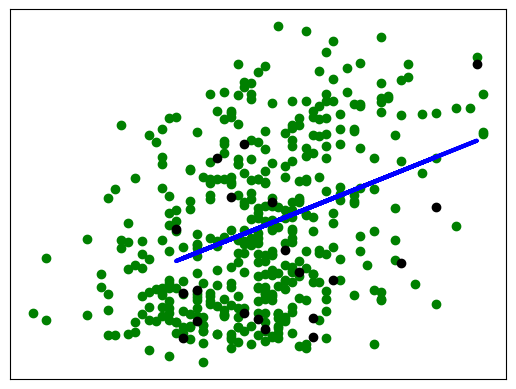

In [ ]:
# Coeficientes
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
# Error Cuadrático Medio
print("Mean squared error (MSE): %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Score de Varianza: 1 es predicción perfecta
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Gráfico de salidas
plt.scatter(diabetes_X_train, diabetes_y_train,  color='green')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## <font color='green'>Actividad 1</font>

Utilizaremos el dataset longley, el cual es ideal para realizar regresiones. El conjunto de datos de Longley contiene varias variables macroeconómicas de USA. Que se sabe que son altamente colineales.

1. Implementar un modelo de regresión lineal entre el producto interno bruto (GNP) y el número total de gente empleada (Employed).
2. Calcule las métricas del modelo: MSE, RMSE y R2.
2. Graficar los datos utilizados y el resultado de la regresión lineal.

In [ ]:
# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Creando un DataFrame de pandas.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head() # longley dataset
df.shape

(16, 7)

In [ ]:
df.shape

(16, 7)

In [ ]:
# Solución
longley_X = df['GNP'].array.reshape(-1, 1)
longley_Y = df['Employed'].array

# Dividir los datos en conjuntos de training/testing
longley_X_train = longley_X[:-4]
longley_X_test = longley_X[-4:]

# Dividir las salidas en conjuntos de training/testing
longley_Y_train = longley_Y[:-4]
longley_Y_test = longley_Y[-4:]

In [ ]:
# Crear la Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenar el modelo usando los datos de entrenamiento (training)
regr.fit(longley_X_train, longley_Y_train)

# Predecir usando el conjunto de test
longley_Y_pred = regr.predict(longley_X_test)

w = [0.03753738], b = 50.94882786089909
Mean squared error (MSE): 0.72
Variance score: -0.56


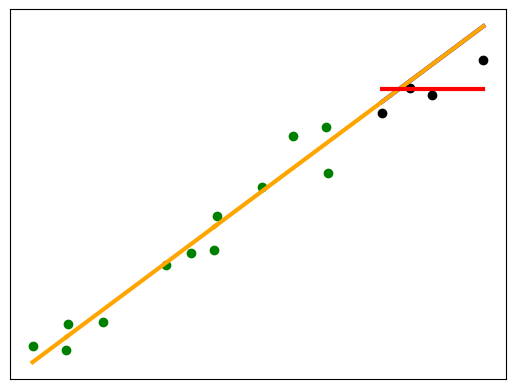

In [ ]:
# Coeficientes
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
# Error Cuadrático Medio
print("Mean squared error (MSE): %.2f"
      % mean_squared_error(longley_Y_test, longley_Y_pred))
# Score de Varianza: 1 es predicción perfecta
print('Variance score: %.2f' % r2_score(longley_Y_test, longley_Y_pred))

# Gráfico de salidas
plt.scatter(longley_X_train, longley_Y_train,  color='green')
plt.scatter(longley_X_test, longley_Y_test,  color='black')
plt.plot(longley_X_test, longley_Y_pred, color='blue', linewidth=3)
plt.plot(longley_X, regr.coef_*longley_X + regr.intercept_, color='orange', linewidth=3)
plt.plot(longley_X_test, np.mean(longley_Y_test)*np.ones(4), color='red', linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Modelo de Regresión Logística**</font>

Usa un **enfoque probabilístico**.

$h_{\theta}(x)$ debería ser $p(y=1/x;\theta)$.

Modelo de regresión logística:

$$h_{\theta}(x)=g(\theta^{T}x)$$
$$g(z) = \frac{1}{1+e^{-z}}$$
$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

![Link](https://i.ibb.co/V3kRWhG/reglog.png)

$\theta^{T}x$ debería tener valores **negativos** grandes para instancias negativas y valores **positivos** grandes para instancias positivas.

Definir un umbral:

* Predecir $y=1$ si $h_{\theta}(x) 	\geq0.5$
* Predecir $y=0$ si $h_{\theta}(x) 	< 0.5$

![Link](https://i.ibb.co/WWLprKq/reglog2.png)

### Aplicación de Regresión Logística


Ejemplo basado en este [link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html).

Definiremos los límites de decisión de un clasificador de regresión logística para las dos primeras dimensiones (longitud y ancho del sépalo) del conjunto de datos de la flor de iris. Los puntos de datos están coloreados de acuerdo con sus etiquetas.

![Link](https://i.ibb.co/pL5RVNR/reglog3.png)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
# importar la data de la flor iris
iris = datasets.load_iris()

In [ ]:
X = iris.data[:, :2]  # seleccionar las 2 primeras características.
y = iris.target
X = X[y<2]            # usaremos solo 2 clases
y = y[y<2]            # usaremos solo 2 clases

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
def plot_decision_boundary(X, y, regression):
    # Gráfico de los límites de decisión. Para eso, asignaremos un color a cada
    # punto en la malla [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # tamaño de paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Poner el resultado en un gráfico de color
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plotear los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

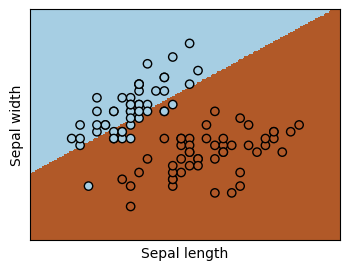

In [ ]:
# crear una instancia de clasificador de regresión logística
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=2).fit(X, y)
plot_decision_boundary(X, y, logreg)

## <font color='green'>Actividad 2</font>

1. Utilizando el modelo de regresión logística anterior, varíe los parámetros del modelo y vea los efectos sobre los límites de clasificación.
2. Aplique el modelo sobre las mismas 2 características usadas anteriomente, pero utilice las 3 clases que existen para la flor de iris.

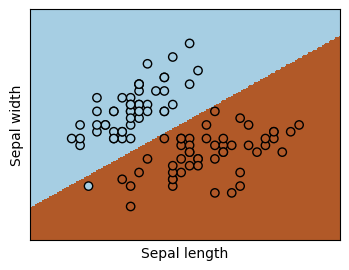

In [ ]:
# Solución
# crear una instancia de clasificador de regresión logística
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=10).fit(X, y)
plot_decision_boundary(X, y, logreg)


In [ ]:
X = iris.data[:, :2]  # seleccionar las 2 primeras características.
y = iris.target
X = X[y<3]            # usaremos solo 3 clases
y = y[y<3]            # usaremos solo 3 clases

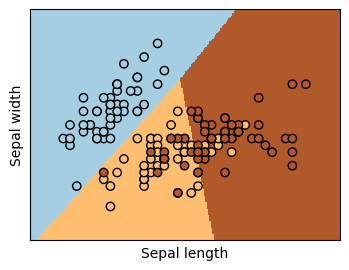

In [ ]:
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=100).fit(X, y)
plot_decision_boundary(X, y, logreg)

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Naive Bayes**</font>

Es un clasificador basado en el teorema de Bayes, con una asunción “naive” sobre los datos. Es muy sencillo de programar y entender.

Sirve mucho como baseline y, aunque simplista, puede tener resultados que sobrepasan a algoritmos mucho más complejos. Es rápido de entrenar y funciona con datos de mucha dimensionalidad, por ejemplo es muy útil a la hora de clasificar documentos.

El algoritmo de “Naive Bayes”  está fuertemente ligado al teorema de Bayes.
El Teorema de Bayes establece:

$$P(A\mid B)=\frac{P(B\mid A)P(A)}{P(B)}$$

El teorema establece que se puede encontrar la probabilidad de **A** (una clase objetivo) dada la ocurrencia de **B** (un conjunto de características). Es decir, **B** es la evidencia y **A** es la hipótesis.

Bajo el teorema de Bayes, el principal supuesto es que **los atributos son independientes entre sí**
.
La presencia de un feature no afecta a los otros. Este supuesto es “naive” (ingenuo), por eso el nombre del algoritmo. Un segundo supuesto, es que todos los atributos tienen el mismo efecto en la salida del algoritmo.

En base a lo establecido, se puede utilizar el teorema de Bayes para calcular la probabilidad de una clase $y$ de la siguiente manera:

$$P(y\mid X)=\frac{P(X\mid y)P(y)}{P(X)}$$

donde $y$ representa la clase y $X$ representa el vector de características $X=(x_{1}, x_{2},x_{3},...,x_{n})$

Reemplanzando $X$ en la ecuación nos queda:

$$P(y\mid x_{1}, x_{2},x_{3},...,x_{n})=\frac{P(x_{1}\mid y)P(x_{2}\mid y)...P(x_{n}\mid y)P(y)}{P(x_{1})P(x_{2})...P(x_{n})}$$

$$P(y\mid x_{1}, x_{2},x_{3},...,x_{n}) \alpha P(y)\prod_{i=1}^{n}P(x_{i}\mid y)$$

**Tipos de Algoritmos**

* **Bernoulli Naive Bayes**: Para casos donde los atributos son variables binarias, por ejemplo si una palabra ocurre o no en un documento.

* **Multinomial Naive Bayes**: Para casos donde los atributos representan frecuencias, por ejemplo la cantidad de veces que una palabra ocurre en un documento.

* **Gaussian Naive Bayes**: Para casos donde los atributos toman valores continuos, se asume que los valores son muestras de una distribución gaussiana. Esto se usa para calcular las probabilidades condicionales en el algoritmo.

### Aplicación de Naive Bayes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_table("/content/drive/MyDrive/Clases 2024/MII 900 Ciencia de Datos/Data/spam_or_ham.txt", header=None, names=["target", "text"])
dataset.head()

In [ ]:
vectorized_data = CountVectorizer().fit_transform(dataset["text"])
vectorized_data[1:5,:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, dataset.target, test_size=0.2)

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

## <font color='green'>Actividad 3</font>

Utilizando el conjunto de datos de la flor de iris, implementar un modelo de Gaussian Naive Bayes para clasificar los datos en cada una de las 3 especies de la flor de iris.

1. Implemente el modelo de GNB
2. Cálcule las métricas del modelo y la matriz de confusión


In [ ]:
!pip install pymc3 arviz==0.13.0 numpy==1.21.1

In [ ]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Solución

<font color='green'>Fin Actividad 3</font>

## <font color='blue'>**Redes Neuronales**</font>

Una red neuronal es "un sistema para el tratamiento de la información, cuya unidad básica de procesamiento está inspirada en la célula fundamental del sistema nervioso humano: **la neurona**".

Las neuronas son un componente relativamente simple pero conectadas de a miles forman un poderoso sistema.

El cerebro humano contiene más de cien mil millones de neuronas. La clave para el procesamiento de la información son las conexiones entre ellas llamadas **sinápsis**.

Las **dendritas** son la vía de entrada de las señales que se combinan en el cuerpo de la neurona. El **axón** es el camino de salida de la señal generada por la neurona. En las terminaciones sinápticas se encuentran unas vesículas que contienen unas sustancias químicas llamadas **neurotransmisores**, que propagan señales electroquímicas de una neurona a otra. La neurona es estimulada por sus entradas y cuando alcanza cierto umbral, se dispara o activa pasando una señal hacia el axón.

![Link](https://i.ibb.co/k29k3N7/rna.png)

Las características principales de una red neuronal artifical son:

* Topología:
  * Número de capas.
  * Número de neuronas por capa.
  * Tipo de conexiones.

* Tipo de aprendizaje.

![Link](https://i.ibb.co/Qv109J7/rna2.jpg)



### Aplicación de Redes Neuronales

Utilizaremos las compuertas XOR, las que funcionan de la siguiente manera:

Tenemos dos entradas binarias (1 ó 0) y la salida será 1 sólo si una de las entradas es verdadera (1) y la otra falsa (0).

Es decir que de cuatro combinaciones posibles, sólo dos tienen salida 1 y las otras dos serán 0, como vemos aquí:

* XOR(0,0) = 0
* XOR(0,1) = 1
* XOR(1,0) = 1
* XOR(1,1) = 0

Utilizaremos **Keras** que es una librería de alto nivel, para que nos sea más fácil describir las capas de la red que creamos y en background es decir, el motor que ejecutará la red neuronal y la entrenará estará la implementación de Google llamada **Tensorflow**.

In [ ]:
!pip install keras on jupyter notebook
!pip install tensorflow
import numpy as np
from tensorflow.keras import Sequential
from keras.layers.core import Dense

Utilizaremos numpy para el manejo de arrays. De Keras importamos el tipo de modelo Sequential y el tipo de capa Dense que es la “normal”.

Creamos los arrays de entrada y salida.

In [ ]:
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

Como se puede ver son las cuatro entradas posibles de la función XOR [0,0], [0,1], [1,0],[1,1] y sus cuatro salidas: 0, 1,1,0.

Ahora crearemos la arquitectura de nuestra red neuronal:

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Primero creamos un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”.

Agregamos dos capas Dense con “model.add()”. Realmente serán 3 capas, pues al poner input_dim=2 estamos definiendo la capa de entrada con 2 neuronas (para nuestras entradas de la función XOR) y la primer capa oculta (hidden) de 16 neuronas. Como función de activación utilizaremos “relu” que sabemos que da buenos resultados. Podría ser otra función, esto es un mero ejemplo, y según la implementación de la red que haremos, deberemos variar la cantidad de neuronas, capas y sus funciones de activación.

Y agregamos una capa con 1 neurona de salida y función de activación sigmoid.

![Link](https://i.ibb.co/cL7xdM1/red-eje2.png)

Antes de de entrenar la red haremos unos ajustes de nuestro modelo:

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

Con esto indicamos el tipo de pérdida (loss) que utilizaremos, el “optimizador” de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.

Ahora sí que entrenaremos la red:

Indicamos con model.fit() las entradas y sus salidas y la cantidad de iteraciones de aprendizaje (epochs) de entrenamiento. Este es un ejemplo sencillo, pero recuerda que en modelos más grandes y complejos, necesitarán más iteraciones y a la vez será más lento el entrenamiento.

In [ ]:
model.fit(training_data, target_data, epochs=50)

In [ ]:
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
print (model.predict(training_data).round())

## <font color='green'>Actividad 4</font>

Una empresa agrícola quiere automatizar su proceso productivo, para ello requiere implementar un modelo de machine learning, específicamente una red neuronal artificial (RNA). Se le ha solicitado a Ud implementar un modelo que permita clasificar entre cuatro (4) tipos de frutas, considerando la forma, la textura, el peso y la tonalidad (color principal). El diseño del sistema donde debe incorporarse la RNA se muestra en la siguiente figura.

![Link](https://i.ibb.co/ZL8f7YH/rna3.png)

El vector de entrada para la RNA tiene la siguiente forma: $P = [forma, textura, peso, tonalidad]$.

Los valores de cada parámetro son:
* Forma:
  * 1, si la fruta es redonda
  * 0, si la fruta es alargada
  * -1, si la fruta es elíptica
* Textura:
  * 1, si la superficie de la fruta es suave
  * -1, si la superficie de la fruta es rugosa
* Peso:
  * 1, si el peso de la fruta es ≥ 200 gr
  * 0, si el peso de la fruta es < 200 gr y ≥ 50 gr
  * -1, si el peso de la fruta es < 50 gr
* Tonalidad:
  * 1, si la tonalidad es roja o naranja
  * 0, si la tonalidad es amarilla
  * -1, si la tonalidad es verde

La salida de la red es de la siguiente forma:
* Manzana = [0, 0]
* Naranja = [1, 1]
* Sandía = [1, 0]
* Plátano = [0, 1]

Otros datos:

* Las manzanas y naranjas son redondas
* La sandía es elíptica
* La sandía pesa 1,5 kgr, las manzanas y naranjas pesan 0,15 kgr y un plátano pesa 0,04 kgr

Diseñe una RNA perceptron multicapa que entregue la solución al problema planteado.

In [ ]:
# Solución

<font color='green'>Fin Actividad 4</font>



## <font color='blue'>**Máquinas de Soporte Vectorial (SVM)**</font>

Las **máquinas de soporte vectorial (SVM)** son una clase particularmente poderosa y flexible de **algoritmos supervisados** tanto para clasificación como para regresión.

SVM corresponde a un tipo de clasificación **discriminativa**, que es la que busca modelar cada clase, encontrando una línea o curva (en dos dimensiones) o un plano (en N-dimensiones) que divide las clases entre sí.


### Aplicación de SVM


Como ejemplo de esto, considere el caso simple de una tarea de clasificación, en la que las dos clases de puntos están bien separadas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Un clasificador discriminativo lineal intentaría trazar una línea recta que separe los dos conjuntos de datos y, por lo tanto, crearía un modelo de clasificación. Para datos bidimensionales como el que se muestra aquí, esta es una tarea que podríamos hacer a mano. Pero inmediatamente vemos un problema: **¡hay más de una posible línea divisoria que puede discriminar perfectamente entre las dos clases!**

Podemos dibujarlos de la siguiente manera:

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Se trata de tres separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. Dependiendo de cuál se elija, a un nuevo punto de datos (por ejemplo, el marcado con la "X" en este gráfico) se le asignará una etiqueta diferente. Evidentemente, nuestra simple intuición de "trazar una línea divisoria entre clases" no es suficiente, y necesitamos pensar un poco más.

Las máquinas de soporte vectorial ofrecen una forma mejorada de solucionar este problema.

La idea es la siguiente: en lugar de simplemente dibujar una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un margen de cierto ancho, hasta el punto más cercano. A continuación, se muestra un ejemplo de cómo podría verse esto:

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

En las SVM, la línea que maximiza este margen es la que elegiremos como modelo óptimo. Las SVM son un ejemplo de estimador de margen máximo.

Veamos el resultado de un ajuste real a los datos del ejemplo: utilizaremos el clasificador de vectores de soporte de Scikit-Learn para entrenar un modelo SVM sobre estos datos. Por el momento, usaremos un kernel lineal y estableceremos el parámetro C en un número muy grande (no discutiremos el significado de estos con más profundidad momentáneamente).

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Esta es la **línea divisoria que maximiza el margen entre los dos conjuntos de puntos**. Observe que algunos de los puntos de entrenamiento solo tocan el margen. Estos puntos son los elementos fundamentales de este ajuste y se conocen como vectores de soporte, y dan nombre al algoritmo. En Scikit-Learn, los valores de estos puntos se almacenan en el atributo *support_vectors_* del clasificador:

In [ ]:
model.support_vectors_

## <font color='green'>Actividad 5</font>

La manera más simple de realizar la separación es mediante una línea recta, un plano o un hiperplano N-dimensional.

Desafortunadamente los universos a estudiar no se suelen presentar en casos idílicos de dos dimensiones como en el ejemplo anterior, sino que un algoritmo SVM debe tratar con a) más de dos variables predictoras, b) curvas no lineales de separación, c) casos donde los conjuntos de datos no pueden ser completamente separados, d) clasificaciones en más de dos categorías.

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=1E10)
model.fit(X,y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Implemente un SVM que sea capaz de separar las clases rojas y amarillas.

<font color='green'>Fin Actividad 5</font>

## <font color='blue'>**Árboles de Decisión y Random Forest**</font>

**Random Forest** es un ejemplo de un método de conjunto o ensamblado, lo que significa que se basa en agregar los resultados de un conjunto de estimadores más simples. El resultado algo sorprendente con tales métodos de conjunto es que la suma puede ser mayor que las partes: es decir, ¡un voto mayoritario entre varios estimadores puede terminar siendo mejor que cualquiera de los estimadores individuales que votan!.


Random Forests es un ejemplo de un modelo de *ensemble learning* construido sobre árboles de decisión.

Los árboles de decisión son formas extremadamente intuitivas de clasificar o etiquetar objetos: simplemente haga una serie de preguntas diseñadas para concentrarse en la clasificación. Por ejemplo, si quisiera construir un árbol de decisiones para clasificar un animal con el que se encuentra durante una caminata, puede construir el que se muestra aquí:

![Link](https://i.ibb.co/nPdf3Cq/05-08-decision-tree.png)

La división binaria hace que esto sea extremadamente eficiente: en un árbol bien construido, cada pregunta reducirá el número de opciones a aproximadamente la mitad, reduciendo muy rápidamente las opciones incluso entre un gran número de clases. El truco, por supuesto, está en decidir qué preguntas hacer en cada paso. En las implementaciones de aprendizaje automático de árboles de decisión, las preguntas generalmente toman la forma de divisiones alineadas con el eje en los datos: es decir, cada nodo del árbol divide los datos en dos grupos utilizando un valor de corte dentro de una de las características.

## <font color='blue'>**Aplicación de Árboles de Decisión y Random Forest**</font>

Considere los siguientes datos bidimensionales, que tienen una de cuatro etiquetas de clase:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Un árbol de decisión simple construido sobre estos datos dividirá iterativamente los datos a lo largo de uno u otro eje de acuerdo con algún criterio cuantitativo, y en cada nivel asignará la etiqueta de la nueva región de acuerdo con un voto mayoritario de puntos dentro de ella. En la figura se presenta una visualización de los primeros cuatro niveles de un clasificador de árbol de decisión para estos datos:

![Link](https://i.ibb.co/sWdSfgk/05-08-decision-tree-levels.png)

Observe que después de la primera división, todos los puntos de la rama superior permanecen sin cambios, por lo que no es necesario subdividir más esta rama. A excepción de los nodos que contienen todos de un color, en cada nivel cada región se divide nuevamente a lo largo de una de las dos características.

Este proceso de ajustar un árbol de decisiones a nuestros datos se puede realizar en Scikit-Learn con el estimador DecisionTreeClassifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
visualize_classifier(DecisionTreeClassifier(max_depth=3), X, y)

A medida que aumenta la profundidad del árbol, tendemos a obtener regiones de clasificación de formas muy extrañas; por ejemplo, a una profundidad de cinco, hay una región púrpura alta y delgada entre las regiones amarilla y azul. Está claro que esto es menos un resultado de la verdadera distribución intrínseca de los datos y más un resultado de las propiedades particulares de muestreo o ruido de los datos. Es decir, este árbol de decisiones, incluso a solo cinco niveles de profundidad, claramente sobrepasa nuestros datos. **Esto se conoce como sobreajuste (over-fitting).**

El sobreajuste resulta ser una propiedad general de los árboles de decisión: es muy fácil profundizar demasiado en el árbol y, por lo tanto, ajustar los detalles de los datos particulares en lugar de las propiedades generales de las distribuciones de las que se extraen. Otra forma de ver este ajuste excesivo es observar modelos entrenados en diferentes subconjuntos de datos; por ejemplo, en esta figura entrenamos dos árboles diferentes, cada uno en la mitad de los datos originales:

![Link](https://i.ibb.co/9hxXfRV/05-08-decision-tree-overfitting.png)

**Ensembles de estimadores: Random Forests**

Esta noción —en que se pueden combinar múltiples estimadores de sobreajuste para reducir el efecto de este sobreajuste— es lo que subyace a un método de conjunto llamado *bagging*. El bagging hace uso de un conjunto de estimadores paralelos, cada uno de los cuales se ajusta en exceso a los datos y promedia los resultados para encontrar una mejor clasificación. Un conjunto de árboles de decisión aleatorios se conoce como **random forests**.

Este tipo de clasificación de bagging se puede hacer manualmente usando el metaestimador BaggingClassifier de Scikit-Learn, como se muestra aquí:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(max_depth=2)
bag = BaggingClassifier(tree, n_estimators=10, max_samples=0.5,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

## <font color='green'>Actividad 6</font>

Random forests también pueden funcionar en el caso de regresión (es decir, variables continuas en lugar de categóricas). El estimador a utilizar para esto es **RandomForestRegressor**, y la sintaxis es muy similar a la que vimos anteriormente.

Considere los siguientes datos, extraídos de la combinación de una oscilación rápida y lenta:

In [ ]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

1. Usando el regresor de random forests encuentre la curva de mejor ajuste a los datos generados anteriormente.
2. Grafique su resultado.

In [ ]:
# Solución

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0)
print(x)
x=x.reshape(-1,1)
print(x)
regr.fit(x, y)
y_pred=regr.predict(x)
plt.errorbar(x, y, 0.3, fmt='o');
plt.errorbar(x, y_pred, 0.3, fmt='o');

<font color='green'>Fin Actividad 6</font>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MII900/AtencionesUrgencia2024.csv', encoding = 'latin-1', header=1, on_bad_lines='skip', sep=';')

In [ ]:
df.shape

(4759807, 21)

In [ ]:
df.iloc[0, :]

16-805                                                                           16-805
SAPU José Dionisio Astaburuaga                           SAPU José Dionisio Astaburuaga
33                                                                                   42
 - COVID-19, VIRUS NO IDENTIFICADO U07.2     - CAUSAS POR TRASTORNOS MENTALES (F00-F99)
0                                                                                     0
0.1                                                                                   0
0.2                                                                                   0
0.3                                                                                   0
0.4                                                                                   0
0.5                                                                                   0
01/01/2024                                                                   01/01/2024
1                               